In [10]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [54]:
IMAGE_SIZE = 255
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

dataset = tf.keras.preprocessing.image_dataset_from_directory("PlantVillage",
                                                    shuffle=True ,
                                                    image_size =(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size = BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [29]:
class_names = dataset.class_names

In [30]:
class_names


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [27]:
#checking the number of batches

len(dataset) 

68

In [22]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 255, 255, 3)
[0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0]


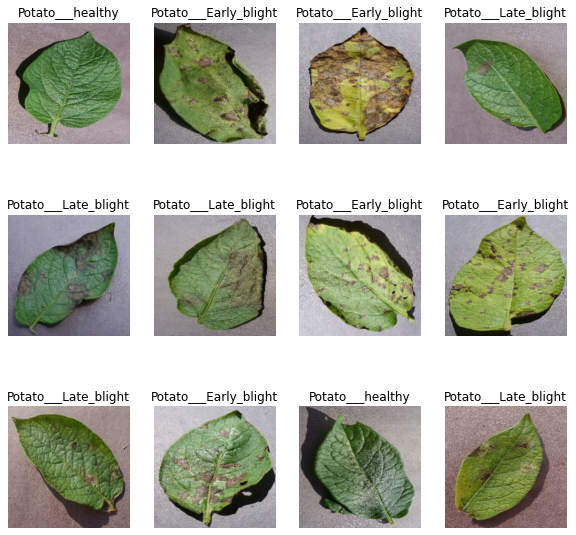

In [53]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):  
        ax = plt.subplot(3,4,i+1)
        plt.title(class_names[label_batch[i]])
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
    

In [70]:
def get_dataset_partitions_tf(ds,train_split = 0.8,val_split = 0.1,test_split = 0.1,shuffle = True, shuffle_size = 10000  ):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds
    

In [71]:
train_ds, val_ds, test_ds =  get_dataset_partitions_tf(dataset)

In [76]:
print("train_ds: {} val_ds: {} test_ds: {}".format(len(train_ds),len(val_ds),len(test_ds)))

train_ds: 54 val_ds: 6 test_ds: 8


In [80]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE )
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [81]:
resize_and_rescale = tf.keras.Sequential([layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
                                         layers.experimental.preprocessing.Rescaling(1.0/255)])

In [82]:
data_augmentation = tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                                        layers.experimental.preprocessing.RandomRotation(0.2)])